In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

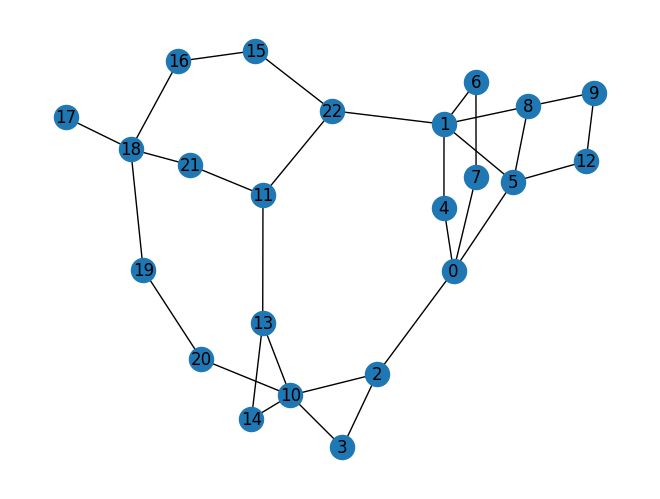

In [7]:
graph = nx.read_graphml('graphml_ds/Untitled.graphml')
nx.draw(graph, with_labels=True)

In [15]:
graph.edges(data=True)

EdgeDataView([('0', '2', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '0'}), ('0', '4', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '1'}), ('0', '5', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '2'}), ('0', '7', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '3'}), ('1', '8', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '4'}), ('1', '22', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '5'}), ('1', '4', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '6'}), ('1', '5', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '7'}), ('1', '6', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service', 'id': '8'}), ('2', '10', {'weight': 1.0, 'key': 0, 'LinkLabel': 'Leased Wavelength/Managed Service

In [ ]:
from mininet.net import Mininet
import networkx as nx

def construct_mininet_from_networkx(graph, host_range):
    """ Builds the mininet from a networkx graph.

    :param graph: The networkx graph describing the network
    :param host_range: All switch indices on which to attach a single host as integers
    :return: net: the constructed 'Mininet' object
    """

    net = Mininet()
    # Construct mininet
    for n in graph.nodes:
        net.addSwitch("s_%s" % n)
        # Add single host on designated switches
        if int(n) in host_range:
            net.addHost("h%s" % n)
            # directly add the link between hosts and their gateways
            net.addLink("s_%s" % n, "h%s" % n)
    # Connect your switches to each other as defined in networkx graph
    for (n1, n2) in graph.edges:
        net.addLink('s_%s' % n1,'s_%s' % n2)
    return net